<a href="https://colab.research.google.com/github/Praful22/A1-unitree-Quadrupedal-robot/blob/main/ModelingSingleNeuronsNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modeling Single Neurons

1. Model: Mathematical representation through logic-based development of continuous or discrete natural or anything but natural phenomenon.


2. Modeling: The process of developing models based on known observations, hitherto verified laws, and creativity.

3. Neuron(s): νεῦρον meaning 'sinew, tendon, cord' [Wikipedia](https://en.wikipedia.org/wiki/Neuron#Etymology_and_spelling:~:text=the%20ancient%20Greek-,%CE%BD%CE%B5%E1%BF%A6%CF%81%CE%BF%CE%BD,-neuron%20%27sinew%2C%20cord) in the context of the brain (Neuroscience): Neuron is a cell that transmits "electrical signals" throughout a neuronal network. Arguably, the most important type of cell in the nervous system.

Further discussion and development will be towards a mathematical and computational models of neurons focusing primarily on neurons present in the *cerebral cortex* which is regarded as the central processing area of the "mammalian" brain.

What is "*cerebral cortex*"?
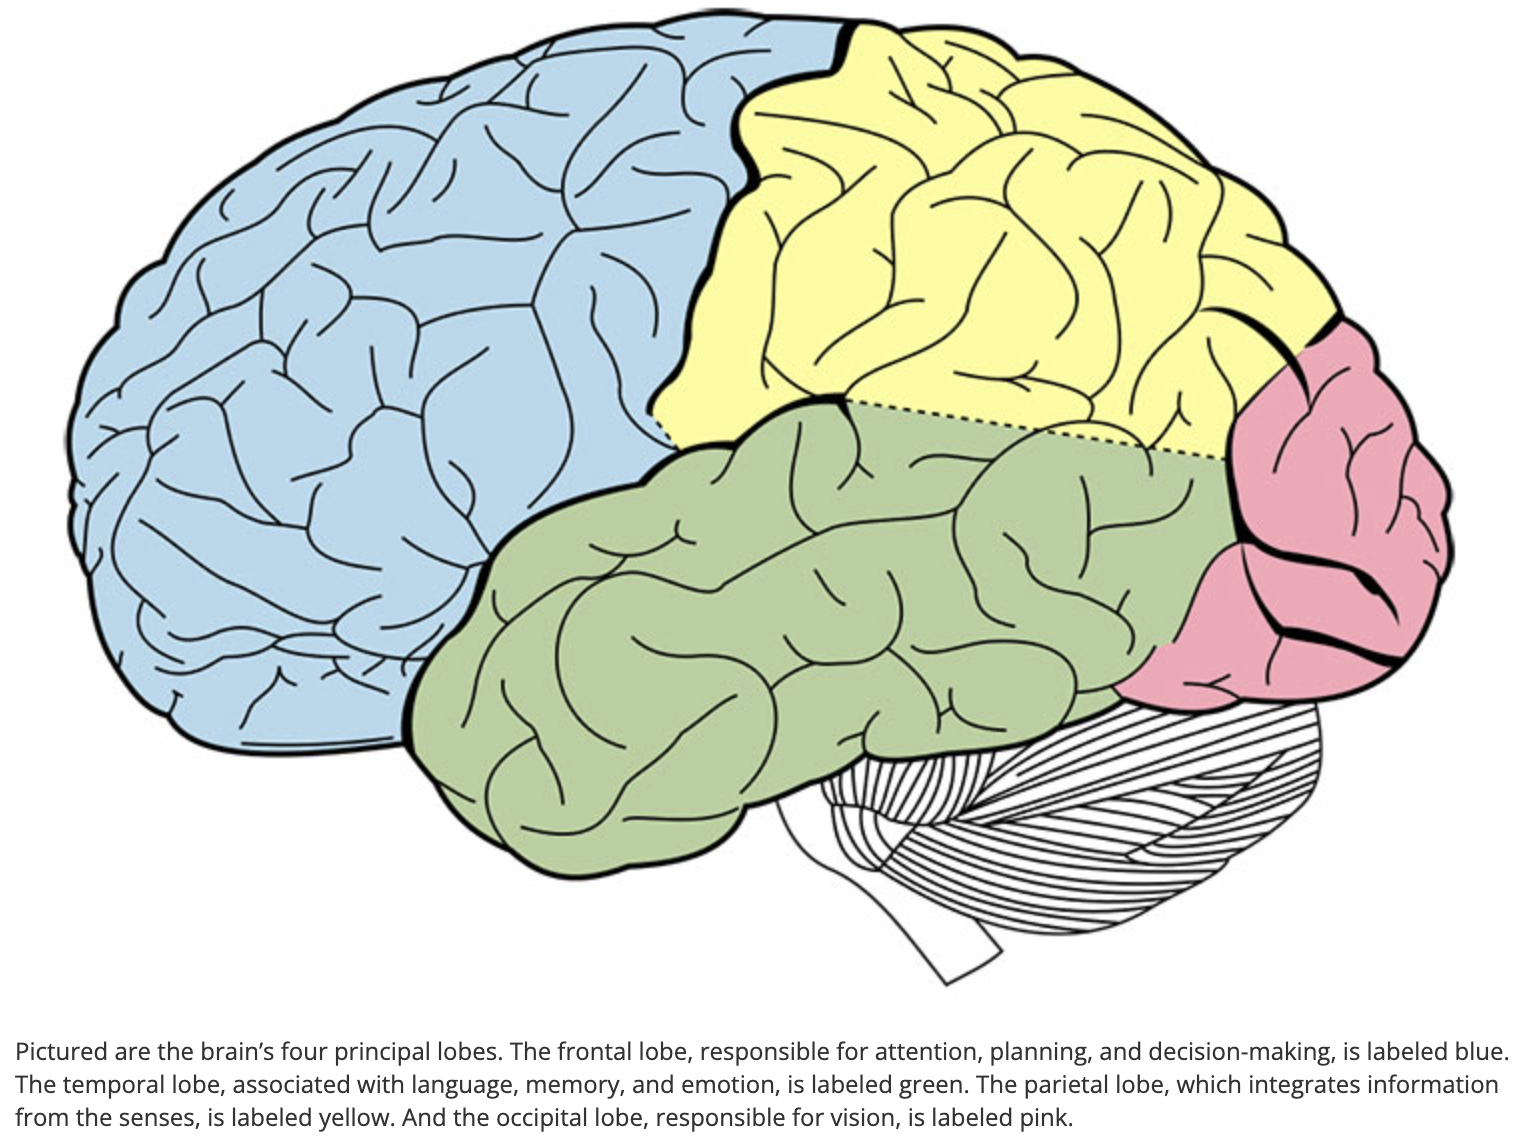

Above Picture Credit: https://www.brainfacts.org/brain-anatomy-and-function/anatomy/2022/major-brain-landmarks-110822

Interactive 3D Neuro-anatomy: https://www.brainfacts.org/3d-brain#intro=false&focus=Brain


The Cerebral Cortex is a sheet of neural tissue with multiple layers, folded up to form the outermost part of the brain. Among diverse types of neurons, a prototypical cortical neuron is in the observed ballpark size of 10 μm (micrometers)[1] and is composed of three parts: the dendrites, soma, and axon.
Following is a figure from [1] for a prototypical neuron that will be used in our discussion.

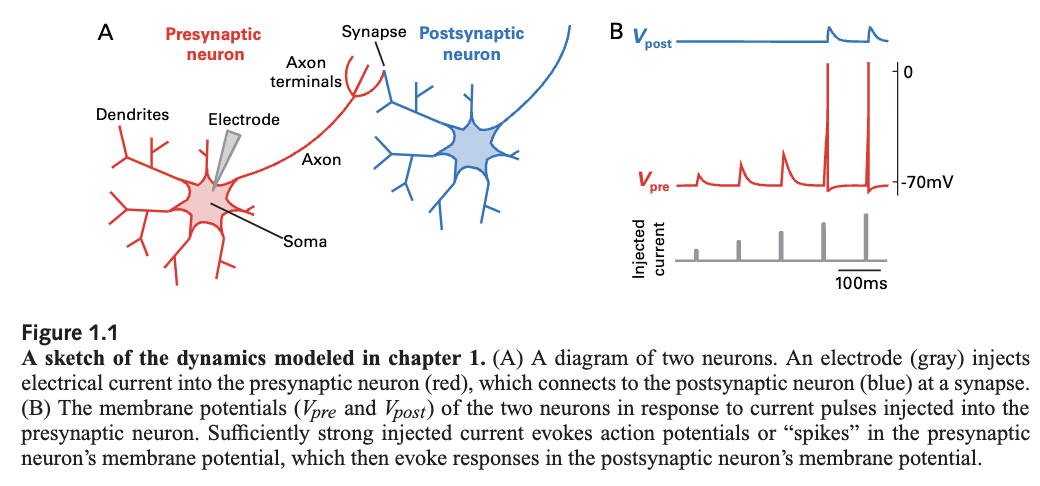

Dendrites: Greek δενδρίτης (dendrítēs, “of or pertaining to a tree”) Tree-like structures on which neurons receive input from other neurons at connections. (Connections are called synapses)

Axon: Greek ἄξων, axis. A long threadlike part of the neuron. The neuron's response to its input propagates down the axon, where it can be communicated to other neurons.

Soma: Greek σῶμα (sôma, “body”). Cell body where the inputs are "integrated".



It has been observed that neurons maintain a negative electric potential across their membranes, meaning that the ratio of negatively to positively charged ions is greater inside the cell than outside it. To be specific, potential across the neuron's membrane is around -70 mV (milli-volts). This electric potential is called the neuron's *membrane potential*, which may be denoted as V. The membrane potential is modulated when charged ions flow through the ion channels in the membrane.

When a neuron's membrane potential reaches around V ≈ -55 mV, the opening and closing of different ion channels create an action potential or spike, which is a deviation of V to around 0-10mV that lasts about 1-2 ms. Spikes propagate down the neuron's axon, where they activate synapses. The synapses open ion channels on the postsynaptic neuron's membrane, causing a brief pulse of current.

Let's dive into the process of modeling the above-mentioned dynamics using mathematical and computational models:


1. **The Leaky Integrator Model:**
A neuron's membrane potential may be modeled as a leaky capacitor which takes the form of a first-order differential equation:
\
$C_m\frac{dV}{dt} = I(t)$\
$C_m \dot{V} = I(t)$

where, V(t) $\stackrel{\Delta}{=}$ membrane's potential [mV],\
I(t) $\stackrel{\Delta}{=}$ Average current per-unit Area, \
If I > 0, then it increases the membrane potential, hence called inward or depolarizing current. If negative ion flow out of the cell, it is called the inward current.\
If I < 0, then it decreases the membrane potential, hence called outward or hyperpolarizing current.If negative ion is flowing into the cell, then it is called the outward current.

### Observed mechanisms on how ions pass through membranes:
1. Ion Pumps
2. Ion Channels

#### **1. Ion Pumps:**
Ion pumps use energy to maintain ion concentration differences across the cell membrane. For example, the sodium-potassium (Na-K) pump, which pumps two $K^+$ ions in for each of three $Na^+$ pumped out, giving a net-negative current. The Na-K pump is the primary mechanism through which neurons maintain a negative potential.
#### **2. Ion Channels:**
Ion channels may be thought of as pores that facilitate the movement of ions through membranes. Ions diffuse due to concentration gradient and electrical gradient (opposite to pumps where ions are forced through). The variations in ions channels dictate variations in the types of ions that move through these channels. There are thousands of types of channels in the human brain.


For most cortical neurons, the overall effects of many ion channels and pumps when the membrane potential is near rest (V around -70 mV) can be approximated by a single current called the ***leak current***, which is defined by:\
$ I_L = - g_L(V-E_L) $ \
The constant $g_L > 0$ is called the ***leak conductance*** and the constant $E_L$ is the equilibrium or resting potential of the neuron. Different ion pumps and channels pull V in different directions with different strengths. The equilibrium potential, $E_L$, is the value of V at which $I_L =0$. i.e. $V = E_L$ so $I_L = 0$.

1. IF $V > E_L$, the membrane potential is depolarized.
2. If $ V < E_L$, the membrane potential is hyperpolarizerd.

The conductance $g_L$ measures how strongly V is pulled toward $E_L$.

In addition to the leak current, we might want to model the current injected by a scientist's electrode(as shown in figure 1.1a) or some other current source.
To this end, we define the total membrane current as:\
$I = I_L + I_x$
where $I_x$ is any external source of current that we want to model.(Neuron's external input current)

Now, the mathematically the leaky integrator model takes the form:

$ C_m \frac{dV}{dt} = - g_L (V - E_L) + I_x(t)$

This model is a decent approximation of the subthreshold or passive properties of some neurons: i.e. the behavior of V(t) below the spiking threshold and therefore in the absence of spikes. The model can be simplified by setting:\
$ \tau_m = \frac{C_m}{g_L}$
and rescaling the input current by taking $I_x ← I_x/g_L$ to get the following model:\


$\[ \tau_m \frac{dV}{dt} = - (V - E_L) + I_x(t)]\$ .. (1) \

The parameter $\tau_m$ is called the **membrane time constant** and sets the timescale of the membrane potential dynamics. Typical cortical neurons have member time constants around 5-20 ms.

$I_x(t)$ in 1 is not the current but a quantity rescaled by $g_L$ with the dimensions of electric potential (same as V(t)), typically measured in millivolts. It may be modeled as current since it is proportional to the actual external current.

Let's analyze the equation (1).\
Case 1: Time-constant input, $I_0$, i.e. $I_x(t) = I_0$\
For case 1, Equation (1) is an autonomous, first-order linear differential equation which has a solution of the form:\
$[ V(t) = (V_0 - E_L - I_0)e^\frac{-t}{\tau_m} + E_L + I_0 ]$ .. (2) \
where V(0) = $V_0$ is the initial condition.
Equation (2) represents an exponential decay to $E_L + I_0$. The timescale of this decay is set by $\tau_m$. \
Note: $\tau_m$ is the amount of time required for the membrane potential to get to a proportion $1-e^{-1} \approx 0.63$ way from $V(0)$ to $E_L + I_0$.



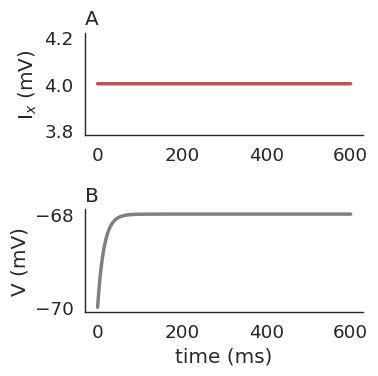

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')

T=600
dt=.1
time=np.arange(0,T,dt)

# Neuron parameters
EL=-72
taum=15

# Initial condition
V0=-70

# Time-constant input current
I0=4

# Compute V
V=(V0-EL-I0)*np.exp(-time/taum)+EL+I0

# Make figure
plt.subplots(2,1,figsize=(4,4))

plt.subplot(2,1,1)
plt.plot(time,I0+0*time,color='r')
plt.ylabel('I$_x$ (mV)')
plt.title('A',loc='left')
sns.despine()


plt.subplot(2,1,2)
plt.plot(time,V,color='gray')
plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
plt.title('B',loc='left')
sns.despine()
plt.tight_layout()

## References:

[1] Rosenbaum, Robert. Modeling Neural Circuits Made Simple with Python. MIT Press, 2024.

